Polynomial Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
X = df.iloc[:, 1:-1].values  #2D array olarak döndürüyor
y = df.iloc[:, -1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
linear_regressor = LinearRegression()
linear_regressor.fit(X,y)

LinearRegression()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=2)
X_poly = pol_reg.fit_transform(X)  #Feature sütununu üstel olacak şekilde güncelledik. degree 2 olduğu için x1 + x1^2 oldu.
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly, y)

LinearRegression()

In [11]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


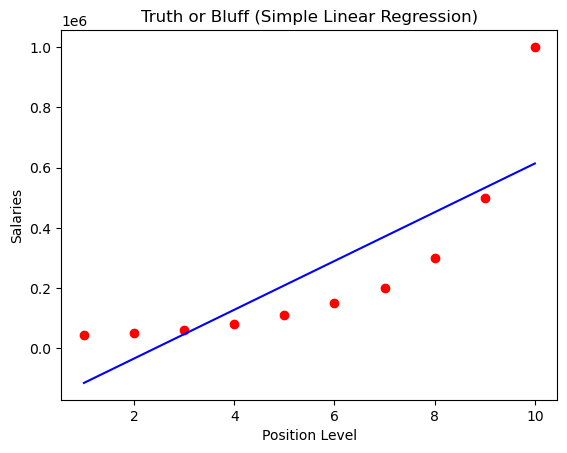

In [12]:
plt.scatter(X, y, color='red')
plt.plot(X, linear_regressor.predict(X), color='blue')
plt.title('Truth or Bluff (Simple Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

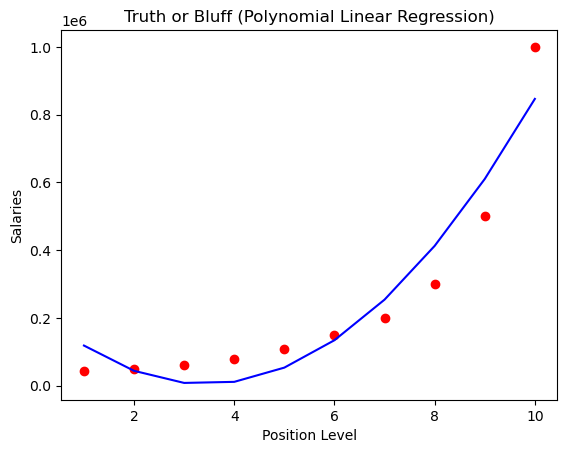

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X, linear_regressor_2.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

In [14]:
pol_reg_with_higher_degree = PolynomialFeatures(degree=4)  # degree'i arttırdık ve böylece modelin daha iyi öğrenmesi sağlandı
X_poly_with_higher_degree = pol_reg_with_higher_degree.fit_transform(X)  
linear_regressor_2_with_higher_degree = LinearRegression()
linear_regressor_2_with_higher_degree.fit(X_poly_with_higher_degree, y)

LinearRegression()

In [15]:
print(X_poly_with_higher_degree)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


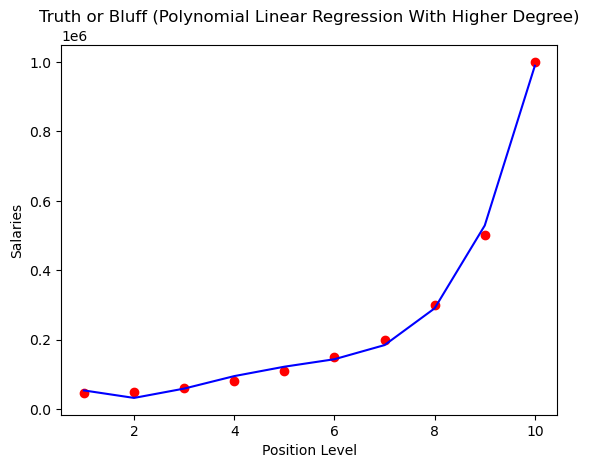

In [16]:
plt.scatter(X, y, color='red')
plt.plot(X, linear_regressor_2_with_higher_degree.predict(X_poly_with_higher_degree), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression With Higher Degree)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

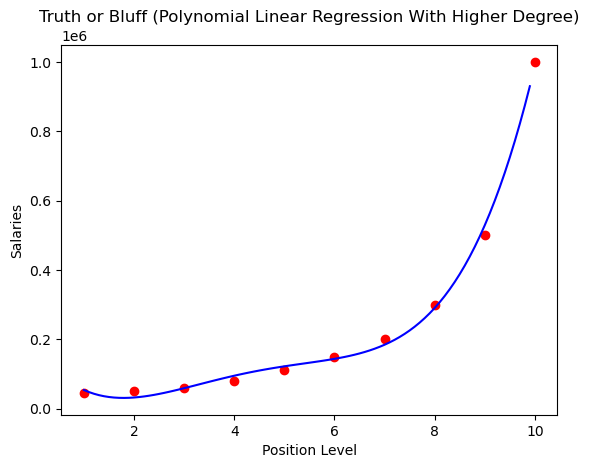

In [17]:
X_grid = np.arange(np.min(X), np.max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, linear_regressor_2_with_higher_degree.predict(pol_reg_with_higher_degree.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression With Higher Degree)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

In [18]:
linear_regressor.predict([[6.5]])

array([330378.78787879])

In [19]:
linear_regressor_2.predict(pol_reg.fit_transform([[6.5]]))

array([189498.10606061])

In [20]:
linear_regressor_2_with_higher_degree.predict(pol_reg_with_higher_degree.fit_transform([[6.5]]))

array([158862.45265153])

In [21]:
linear_regressor_2_with_higher_degree.predict([[1,6.5,42.25,274.62,1785.06]])

array([158937.54370631])